In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import f1_score

import random
random.seed(10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv',parse_dates=True)
test = pd.read_csv('test.csv',parse_dates=True)
train.shape , test.shape

((18834, 11), (8072, 9))

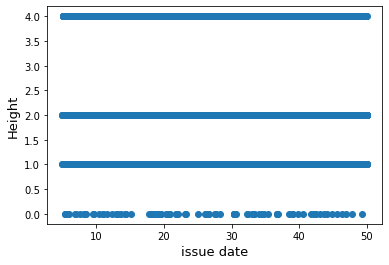

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['height(cm)'], y = train['pet_category'])
plt.ylabel('Height', fontsize=13)
plt.xlabel('issue date', fontsize=13)
plt.show()

In [4]:
train['ID'] = train['pet_id'].apply(lambda x: int(x.split('_')[1]))
test['ID'] = test['pet_id'].apply(lambda x: int(x.split('_')[1]))

In [5]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,ID
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,69903
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,66892
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,69750
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,71623
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,57969


In [6]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,ID
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143,63414.982001
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919,7755.671028
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,49970.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000,56744.750000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000,63351.500000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000,70153.500000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000,76876.000000


In [7]:
train = train.sample(frac=1).reset_index(drop=True)

In [8]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
ID                   0
dtype: int64

In [9]:
train.condition.value_counts(dropna=False)

1.0    6819
0.0    6281
2.0    4257
NaN    1477
Name: condition, dtype: int64

categorical values ['pet_id', 'issue_date', 'listing_date', 'color_type']


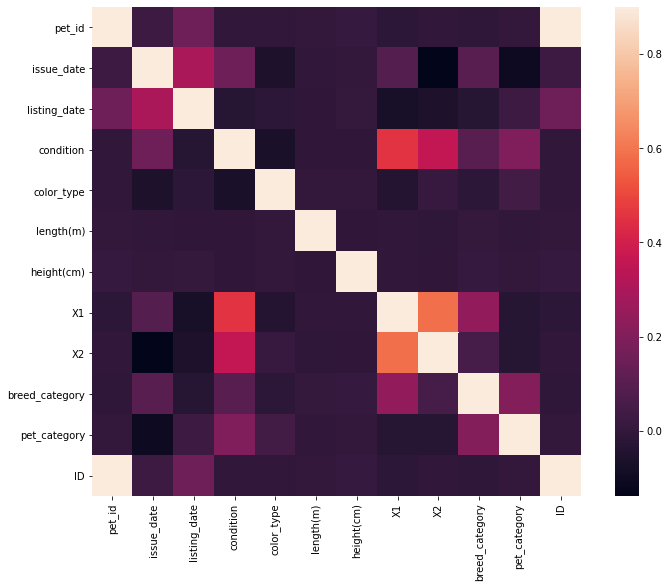

In [10]:
df = train.copy()
df.fillna(3,inplace=True)
cat = list(df.select_dtypes('object'))
print('categorical values',cat)
for i in cat:
    l = LabelEncoder()
    l.fit(df[i])
    df[i]= l.transform(df[i])

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [11]:
all_data = train.append(test)
all_data.shape

(26906, 12)

In [12]:
all_data.fillna(3,inplace=True)

In [13]:
train.nunique()

pet_id            18834
issue_date         3907
listing_date      17209
condition             3
color_type           56
length(m)           101
height(cm)         4425
X1                   20
X2                   10
breed_category        3
pet_category          4
ID                18834
dtype: int64

In [14]:
cat = list(all_data.select_dtypes('object'))
print('categorical values',cat)
for i in cat:
    l = LabelEncoder()
    l.fit(all_data[i])
    all_data[i]= l.transform(all_data[i])

categorical values ['pet_id', 'issue_date', 'listing_date', 'color_type']


In [15]:
all_data = pd.get_dummies(all_data,columns=['color_type'],drop_first=True)
all_data.shape

(26906, 66)

In [16]:
y = train[['breed_category','pet_category']]
all_data.drop(['breed_category','pet_category','pet_id'],axis=1,inplace=True)
test_pet_id = test['pet_id']
cols= list(all_data.columns)

In [17]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]
train.shape , test.shape

((18834, 63), (8072, 63))

In [18]:
X = train[cols]
xtrain , xtest , ytrain , ytest = model_selection.train_test_split(X,y,
                                                                   random_state=10,test_size=0.2)
print('training data', xtrain.shape,ytrain.shape)
print('validation data ',xtest.shape,ytest.shape)

training data (15067, 63) (15067, 2)
validation data  (3767, 63) (3767, 2)


In [19]:
def accuracy(y1,y2):
    f1 = f1_score(y1[:,[0]],y2.iloc[:,0],average='weighted')
    f2 = f1_score(y1[:,[1]],y2.iloc[:,1],average='weighted')
    s=(f1+f2)/2
    print('accuracy',s)

In [20]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)).fit(xtrain,ytrain)
p = clf.predict(xtest)
accuracy(p,ytest)

accuracy 0.5520653113206911


In [21]:
clf.score(xtrain,np.array(ytrain))

0.4802548616181058

In [22]:
clf.score(xtest,np.array(ytest))

0.2997079904433236

In [23]:
accuracy(p,ytest)

accuracy 0.5520653113206911


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
pr = model.predict(xtest)
accuracy(pr,ytest)

accuracy 0.8962543047635829


In [26]:
import xgboost as xg
xgb = MultiOutputClassifier(xg.XGBClassifier(random_state=10))
xgb.fit(xtrain,ytrain)
pl = xgb.predict(xtest)
accuracy(pl,ytest)

accuracy 0.9033233588322893


In [27]:
import lightgbm as lgb 
lg = MultiOutputClassifier(lgb.LGBMClassifier(random_state=10))
lg.fit(xtrain,ytrain)
plg = lg.predict(xtest)
accuracy(plg,ytest)

accuracy 0.8992632536751781


In [ ]:
#random = 89.26
#xgboost = 90.55
#lightgbm = 

In [28]:
import catboost as cat
c = MultiOutputClassifier(cat.CatBoostClassifier())
c.fit(xtrain,ytrain)
pc = c.predict(xtest)
pc = pc.reshape(3767,2)
accuracy(pc,ytest)

Learning rate set to 0.090866
0:	learn: 0.9568451	total: 345ms	remaining: 5m 44s
1:	learn: 0.8461544	total: 380ms	remaining: 3m 9s
2:	learn: 0.7578048	total: 397ms	remaining: 2m 12s
3:	learn: 0.6853407	total: 414ms	remaining: 1m 43s
4:	learn: 0.6240074	total: 430ms	remaining: 1m 25s
5:	learn: 0.5718878	total: 446ms	remaining: 1m 13s
6:	learn: 0.5269011	total: 462ms	remaining: 1m 5s
7:	learn: 0.4880184	total: 477ms	remaining: 59.2s
8:	learn: 0.4534499	total: 492ms	remaining: 54.2s
9:	learn: 0.4235302	total: 508ms	remaining: 50.3s
10:	learn: 0.3970098	total: 523ms	remaining: 47s
11:	learn: 0.3731474	total: 539ms	remaining: 44.4s
12:	learn: 0.3521191	total: 554ms	remaining: 42.1s
13:	learn: 0.3333956	total: 570ms	remaining: 40.2s
14:	learn: 0.3160385	total: 586ms	remaining: 38.5s
15:	learn: 0.3004430	total: 601ms	remaining: 37s
16:	learn: 0.2870612	total: 616ms	remaining: 35.6s
17:	learn: 0.2748912	total: 631ms	remaining: 34.4s
18:	learn: 0.2636402	total: 646ms	remaining: 33.4s
19:	learn:

160:	learn: 0.1409110	total: 2.93s	remaining: 15.3s
161:	learn: 0.1407651	total: 2.95s	remaining: 15.3s
162:	learn: 0.1406591	total: 2.96s	remaining: 15.2s
163:	learn: 0.1406066	total: 2.98s	remaining: 15.2s
164:	learn: 0.1405678	total: 2.99s	remaining: 15.2s
165:	learn: 0.1405491	total: 3.01s	remaining: 15.1s
166:	learn: 0.1402219	total: 3.02s	remaining: 15.1s
167:	learn: 0.1400929	total: 3.04s	remaining: 15.1s
168:	learn: 0.1399482	total: 3.06s	remaining: 15s
169:	learn: 0.1398359	total: 3.07s	remaining: 15s
170:	learn: 0.1397818	total: 3.09s	remaining: 15s
171:	learn: 0.1397395	total: 3.1s	remaining: 14.9s
172:	learn: 0.1396748	total: 3.12s	remaining: 14.9s
173:	learn: 0.1395841	total: 3.14s	remaining: 14.9s
174:	learn: 0.1394930	total: 3.15s	remaining: 14.9s
175:	learn: 0.1394248	total: 3.17s	remaining: 14.8s
176:	learn: 0.1392890	total: 3.18s	remaining: 14.8s
177:	learn: 0.1391252	total: 3.2s	remaining: 14.8s
178:	learn: 0.1389755	total: 3.21s	remaining: 14.7s
179:	learn: 0.138899

322:	learn: 0.1282119	total: 5.48s	remaining: 11.5s
323:	learn: 0.1281196	total: 5.51s	remaining: 11.5s
324:	learn: 0.1281117	total: 5.54s	remaining: 11.5s
325:	learn: 0.1280406	total: 5.55s	remaining: 11.5s
326:	learn: 0.1279994	total: 5.57s	remaining: 11.5s
327:	learn: 0.1279452	total: 5.58s	remaining: 11.4s
328:	learn: 0.1278917	total: 5.6s	remaining: 11.4s
329:	learn: 0.1278141	total: 5.62s	remaining: 11.4s
330:	learn: 0.1277729	total: 5.63s	remaining: 11.4s
331:	learn: 0.1277364	total: 5.64s	remaining: 11.4s
332:	learn: 0.1277061	total: 5.66s	remaining: 11.3s
333:	learn: 0.1275999	total: 5.68s	remaining: 11.3s
334:	learn: 0.1275302	total: 5.69s	remaining: 11.3s
335:	learn: 0.1274443	total: 5.71s	remaining: 11.3s
336:	learn: 0.1273522	total: 5.72s	remaining: 11.3s
337:	learn: 0.1273263	total: 5.74s	remaining: 11.2s
338:	learn: 0.1271674	total: 5.75s	remaining: 11.2s
339:	learn: 0.1270866	total: 5.77s	remaining: 11.2s
340:	learn: 0.1270005	total: 5.79s	remaining: 11.2s
341:	learn: 0

484:	learn: 0.1192485	total: 8.05s	remaining: 8.55s
485:	learn: 0.1191875	total: 8.07s	remaining: 8.53s
486:	learn: 0.1191363	total: 8.08s	remaining: 8.51s
487:	learn: 0.1190584	total: 8.1s	remaining: 8.5s
488:	learn: 0.1190180	total: 8.12s	remaining: 8.48s
489:	learn: 0.1189951	total: 8.13s	remaining: 8.46s
490:	learn: 0.1189063	total: 8.15s	remaining: 8.45s
491:	learn: 0.1188206	total: 8.16s	remaining: 8.43s
492:	learn: 0.1187886	total: 8.18s	remaining: 8.41s
493:	learn: 0.1187671	total: 8.19s	remaining: 8.39s
494:	learn: 0.1187287	total: 8.21s	remaining: 8.37s
495:	learn: 0.1187093	total: 8.22s	remaining: 8.36s
496:	learn: 0.1186472	total: 8.24s	remaining: 8.34s
497:	learn: 0.1186050	total: 8.25s	remaining: 8.32s
498:	learn: 0.1185531	total: 8.27s	remaining: 8.3s
499:	learn: 0.1185355	total: 8.28s	remaining: 8.28s
500:	learn: 0.1184464	total: 8.3s	remaining: 8.27s
501:	learn: 0.1183920	total: 8.31s	remaining: 8.25s
502:	learn: 0.1182940	total: 8.33s	remaining: 8.23s
503:	learn: 0.11

646:	learn: 0.1115365	total: 10.6s	remaining: 5.79s
647:	learn: 0.1115248	total: 10.6s	remaining: 5.77s
648:	learn: 0.1114976	total: 10.6s	remaining: 5.76s
649:	learn: 0.1114652	total: 10.7s	remaining: 5.74s
650:	learn: 0.1114273	total: 10.7s	remaining: 5.73s
651:	learn: 0.1114079	total: 10.7s	remaining: 5.71s
652:	learn: 0.1113837	total: 10.7s	remaining: 5.7s
653:	learn: 0.1113440	total: 10.7s	remaining: 5.68s
654:	learn: 0.1112768	total: 10.8s	remaining: 5.66s
655:	learn: 0.1112420	total: 10.8s	remaining: 5.65s
656:	learn: 0.1111868	total: 10.8s	remaining: 5.63s
657:	learn: 0.1111453	total: 10.8s	remaining: 5.61s
658:	learn: 0.1111074	total: 10.8s	remaining: 5.59s
659:	learn: 0.1110843	total: 10.8s	remaining: 5.58s
660:	learn: 0.1110485	total: 10.8s	remaining: 5.56s
661:	learn: 0.1109994	total: 10.9s	remaining: 5.54s
662:	learn: 0.1109168	total: 10.9s	remaining: 5.53s
663:	learn: 0.1108463	total: 10.9s	remaining: 5.51s
664:	learn: 0.1107690	total: 10.9s	remaining: 5.49s
665:	learn: 0

810:	learn: 0.1043997	total: 13.2s	remaining: 3.08s
811:	learn: 0.1043713	total: 13.2s	remaining: 3.07s
812:	learn: 0.1043322	total: 13.3s	remaining: 3.05s
813:	learn: 0.1042901	total: 13.3s	remaining: 3.03s
814:	learn: 0.1042700	total: 13.3s	remaining: 3.02s
815:	learn: 0.1042278	total: 13.3s	remaining: 3s
816:	learn: 0.1041949	total: 13.3s	remaining: 2.98s
817:	learn: 0.1041678	total: 13.3s	remaining: 2.97s
818:	learn: 0.1041018	total: 13.4s	remaining: 2.95s
819:	learn: 0.1040184	total: 13.4s	remaining: 2.94s
820:	learn: 0.1039664	total: 13.4s	remaining: 2.92s
821:	learn: 0.1039243	total: 13.4s	remaining: 2.9s
822:	learn: 0.1038875	total: 13.4s	remaining: 2.89s
823:	learn: 0.1038701	total: 13.4s	remaining: 2.87s
824:	learn: 0.1038033	total: 13.5s	remaining: 2.85s
825:	learn: 0.1037413	total: 13.5s	remaining: 2.84s
826:	learn: 0.1037351	total: 13.5s	remaining: 2.82s
827:	learn: 0.1037003	total: 13.5s	remaining: 2.81s
828:	learn: 0.1036568	total: 13.5s	remaining: 2.79s
829:	learn: 0.10

973:	learn: 0.0983159	total: 15.8s	remaining: 422ms
974:	learn: 0.0982539	total: 15.8s	remaining: 406ms
975:	learn: 0.0982224	total: 15.9s	remaining: 390ms
976:	learn: 0.0981960	total: 15.9s	remaining: 374ms
977:	learn: 0.0981711	total: 15.9s	remaining: 357ms
978:	learn: 0.0981211	total: 15.9s	remaining: 341ms
979:	learn: 0.0980963	total: 15.9s	remaining: 325ms
980:	learn: 0.0980589	total: 15.9s	remaining: 308ms
981:	learn: 0.0980182	total: 15.9s	remaining: 292ms
982:	learn: 0.0979866	total: 16s	remaining: 276ms
983:	learn: 0.0979238	total: 16s	remaining: 260ms
984:	learn: 0.0978994	total: 16s	remaining: 244ms
985:	learn: 0.0978744	total: 16s	remaining: 227ms
986:	learn: 0.0978571	total: 16s	remaining: 211ms
987:	learn: 0.0978301	total: 16s	remaining: 195ms
988:	learn: 0.0978138	total: 16.1s	remaining: 179ms
989:	learn: 0.0977751	total: 16.1s	remaining: 162ms
990:	learn: 0.0977152	total: 16.1s	remaining: 146ms
991:	learn: 0.0976728	total: 16.1s	remaining: 130ms
992:	learn: 0.0976613	to

141:	learn: 0.2935506	total: 2.61s	remaining: 15.8s
142:	learn: 0.2931551	total: 2.63s	remaining: 15.7s
143:	learn: 0.2927048	total: 2.64s	remaining: 15.7s
144:	learn: 0.2924033	total: 2.66s	remaining: 15.7s
145:	learn: 0.2918895	total: 2.68s	remaining: 15.7s
146:	learn: 0.2911566	total: 2.69s	remaining: 15.6s
147:	learn: 0.2908809	total: 2.71s	remaining: 15.6s
148:	learn: 0.2906338	total: 2.73s	remaining: 15.6s
149:	learn: 0.2901779	total: 2.75s	remaining: 15.6s
150:	learn: 0.2897842	total: 2.77s	remaining: 15.5s
151:	learn: 0.2895198	total: 2.78s	remaining: 15.5s
152:	learn: 0.2890268	total: 2.8s	remaining: 15.5s
153:	learn: 0.2885731	total: 2.82s	remaining: 15.5s
154:	learn: 0.2883676	total: 2.84s	remaining: 15.5s
155:	learn: 0.2880384	total: 2.85s	remaining: 15.4s
156:	learn: 0.2872637	total: 2.87s	remaining: 15.4s
157:	learn: 0.2867918	total: 2.89s	remaining: 15.4s
158:	learn: 0.2858045	total: 2.91s	remaining: 15.4s
159:	learn: 0.2855758	total: 2.92s	remaining: 15.3s
160:	learn: 0

307:	learn: 0.2496669	total: 5.57s	remaining: 12.5s
308:	learn: 0.2494435	total: 5.59s	remaining: 12.5s
309:	learn: 0.2491471	total: 5.61s	remaining: 12.5s
310:	learn: 0.2489065	total: 5.63s	remaining: 12.5s
311:	learn: 0.2488014	total: 5.64s	remaining: 12.4s
312:	learn: 0.2486504	total: 5.66s	remaining: 12.4s
313:	learn: 0.2483633	total: 5.68s	remaining: 12.4s
314:	learn: 0.2480268	total: 5.7s	remaining: 12.4s
315:	learn: 0.2479563	total: 5.71s	remaining: 12.4s
316:	learn: 0.2477683	total: 5.73s	remaining: 12.3s
317:	learn: 0.2473767	total: 5.75s	remaining: 12.3s
318:	learn: 0.2471477	total: 5.77s	remaining: 12.3s
319:	learn: 0.2469676	total: 5.78s	remaining: 12.3s
320:	learn: 0.2468330	total: 5.8s	remaining: 12.3s
321:	learn: 0.2466523	total: 5.82s	remaining: 12.3s
322:	learn: 0.2465689	total: 5.84s	remaining: 12.2s
323:	learn: 0.2464915	total: 5.86s	remaining: 12.2s
324:	learn: 0.2464360	total: 5.88s	remaining: 12.2s
325:	learn: 0.2463387	total: 5.89s	remaining: 12.2s
326:	learn: 0.

474:	learn: 0.2237249	total: 8.57s	remaining: 9.47s
475:	learn: 0.2236511	total: 8.59s	remaining: 9.45s
476:	learn: 0.2233787	total: 8.6s	remaining: 9.43s
477:	learn: 0.2233525	total: 8.62s	remaining: 9.41s
478:	learn: 0.2232430	total: 8.64s	remaining: 9.39s
479:	learn: 0.2231197	total: 8.65s	remaining: 9.38s
480:	learn: 0.2230417	total: 8.67s	remaining: 9.36s
481:	learn: 0.2228072	total: 8.69s	remaining: 9.34s
482:	learn: 0.2226431	total: 8.71s	remaining: 9.32s
483:	learn: 0.2224477	total: 8.72s	remaining: 9.3s
484:	learn: 0.2223986	total: 8.74s	remaining: 9.28s
485:	learn: 0.2222873	total: 8.76s	remaining: 9.26s
486:	learn: 0.2220277	total: 8.78s	remaining: 9.24s
487:	learn: 0.2218825	total: 8.79s	remaining: 9.22s
488:	learn: 0.2217794	total: 8.81s	remaining: 9.21s
489:	learn: 0.2216724	total: 8.83s	remaining: 9.19s
490:	learn: 0.2214408	total: 8.85s	remaining: 9.17s
491:	learn: 0.2213564	total: 8.86s	remaining: 9.15s
492:	learn: 0.2213118	total: 8.88s	remaining: 9.13s
493:	learn: 0.

641:	learn: 0.2034838	total: 11.6s	remaining: 6.46s
642:	learn: 0.2033558	total: 11.6s	remaining: 6.44s
643:	learn: 0.2033084	total: 11.6s	remaining: 6.43s
644:	learn: 0.2032543	total: 11.7s	remaining: 6.42s
645:	learn: 0.2031597	total: 11.7s	remaining: 6.4s
646:	learn: 0.2030563	total: 11.7s	remaining: 6.39s
647:	learn: 0.2029631	total: 11.7s	remaining: 6.37s
648:	learn: 0.2028711	total: 11.7s	remaining: 6.35s
649:	learn: 0.2026647	total: 11.8s	remaining: 6.33s
650:	learn: 0.2026169	total: 11.8s	remaining: 6.31s
651:	learn: 0.2024776	total: 11.8s	remaining: 6.29s
652:	learn: 0.2024158	total: 11.8s	remaining: 6.28s
653:	learn: 0.2023300	total: 11.8s	remaining: 6.26s
654:	learn: 0.2022918	total: 11.8s	remaining: 6.24s
655:	learn: 0.2022530	total: 11.9s	remaining: 6.22s
656:	learn: 0.2021792	total: 11.9s	remaining: 6.2s
657:	learn: 0.2020159	total: 11.9s	remaining: 6.18s
658:	learn: 0.2017983	total: 11.9s	remaining: 6.17s
659:	learn: 0.2017408	total: 11.9s	remaining: 6.15s
660:	learn: 0.

806:	learn: 0.1874226	total: 14.6s	remaining: 3.49s
807:	learn: 0.1873254	total: 14.6s	remaining: 3.47s
808:	learn: 0.1872186	total: 14.6s	remaining: 3.45s
809:	learn: 0.1871324	total: 14.6s	remaining: 3.44s
810:	learn: 0.1870453	total: 14.7s	remaining: 3.42s
811:	learn: 0.1868859	total: 14.7s	remaining: 3.4s
812:	learn: 0.1868534	total: 14.7s	remaining: 3.38s
813:	learn: 0.1868130	total: 14.7s	remaining: 3.37s
814:	learn: 0.1867514	total: 14.8s	remaining: 3.35s
815:	learn: 0.1867247	total: 14.8s	remaining: 3.33s
816:	learn: 0.1866498	total: 14.8s	remaining: 3.31s
817:	learn: 0.1866043	total: 14.8s	remaining: 3.3s
818:	learn: 0.1865443	total: 14.8s	remaining: 3.28s
819:	learn: 0.1864350	total: 14.8s	remaining: 3.26s
820:	learn: 0.1862785	total: 14.9s	remaining: 3.24s
821:	learn: 0.1862307	total: 14.9s	remaining: 3.22s
822:	learn: 0.1861012	total: 14.9s	remaining: 3.21s
823:	learn: 0.1859989	total: 14.9s	remaining: 3.19s
824:	learn: 0.1859192	total: 14.9s	remaining: 3.17s
825:	learn: 0.

974:	learn: 0.1727730	total: 17.7s	remaining: 453ms
975:	learn: 0.1727263	total: 17.7s	remaining: 434ms
976:	learn: 0.1726091	total: 17.7s	remaining: 416ms
977:	learn: 0.1725348	total: 17.7s	remaining: 398ms
978:	learn: 0.1723193	total: 17.7s	remaining: 380ms
979:	learn: 0.1722238	total: 17.7s	remaining: 362ms
980:	learn: 0.1721072	total: 17.8s	remaining: 344ms
981:	learn: 0.1720309	total: 17.8s	remaining: 326ms
982:	learn: 0.1719816	total: 17.8s	remaining: 308ms
983:	learn: 0.1718912	total: 17.8s	remaining: 290ms
984:	learn: 0.1718083	total: 17.8s	remaining: 272ms
985:	learn: 0.1717597	total: 17.9s	remaining: 254ms
986:	learn: 0.1716696	total: 17.9s	remaining: 236ms
987:	learn: 0.1716171	total: 17.9s	remaining: 218ms
988:	learn: 0.1715703	total: 17.9s	remaining: 199ms
989:	learn: 0.1714374	total: 17.9s	remaining: 181ms
990:	learn: 0.1712901	total: 18s	remaining: 163ms
991:	learn: 0.1711860	total: 18s	remaining: 145ms
992:	learn: 0.1710932	total: 18s	remaining: 127ms
993:	learn: 0.1709

In [34]:
type(pc)

numpy.ndarray

In [39]:
pc = pc.reshape(3767,2)

In [40]:
accuracy(pc,ytest)

accuracy 0.9020188407894163


In [42]:
pc

array([[1., 2.],
       [0., 2.],
       [0., 1.],
       ...,
       [0., 1.],
       [2., 4.],
       [0., 1.]])

In [43]:
ypred = c.predict(test[cols])

df1 = pd.DataFrame(test_pet_id,columns=['pet_id'])
df2 = pd.DataFrame(ypred,columns=['breed_category','pet_category'])
df = pd.concat([df1,df2],axis=1)
df.to_csv('submission.csv',index=False)

ValueError: Must pass 2-d input